In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv('diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
col_list=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

In [13]:
for i in col_list:
    df[i]=df[i].replace(0,np.NAN)
    mean=int(df[i].mean(skipna=True))
    df[i]=df[i].replace(np.NAN,mean)
df    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.isnull().sum().sum()

0

In [19]:
x=df.iloc[:,:8].values

In [21]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [23]:
y=df.iloc[:,8].values
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(len(x_train))
print(len(x_test))


537
231


In [27]:
k_range=range(1,20)
scores=[]
for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)
    scores.append(accuracy)
    #print("k={0} accuracy={1}".format(k,accuracy*100))
    print('k=%d accuraccy=%.2f%%'%(k,accuracy*100))
    

k=1 accuraccy=65.80%
k=2 accuraccy=69.70%
k=3 accuraccy=70.56%
k=4 accuraccy=72.29%
k=5 accuraccy=72.29%
k=6 accuraccy=70.56%
k=7 accuraccy=72.29%
k=8 accuraccy=74.89%
k=9 accuraccy=74.46%
k=10 accuraccy=74.03%
k=11 accuraccy=72.73%
k=12 accuraccy=74.03%
k=13 accuraccy=73.59%
k=14 accuraccy=73.59%
k=15 accuraccy=75.32%
k=16 accuraccy=74.89%
k=17 accuraccy=74.46%
k=18 accuraccy=74.89%
k=19 accuraccy=74.89%


Text(0.5, 1.0, 'k values vs model accuracy')

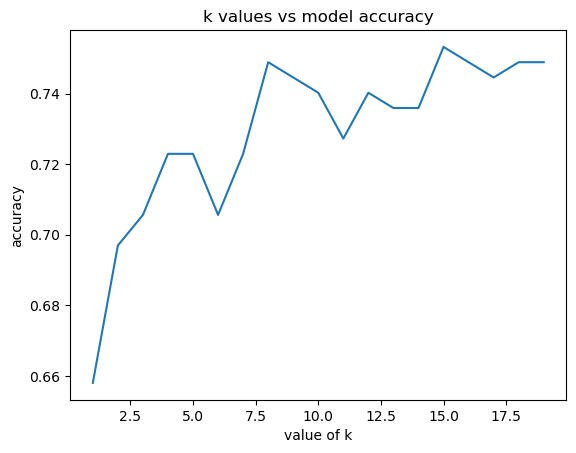

In [29]:
plt.plot(k_range,scores)
plt.xlabel("value of k")
plt.ylabel("accuracy")
plt.title("k values vs model accuracy")

In [31]:
model=KNeighborsClassifier(n_neighbors=15,metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model=KNeighborsClassifier(n_neighbors=15)
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.7672253258845437
0.7532467532467533


In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred_train)
print(cm)
cm1=confusion_matrix(y_test,y_pred_test)
print(cm1)

[[290  53]
 [ 72 122]]
[[135  22]
 [ 35  39]]


Text(50.722222222222214, 0.5, 'Truth')

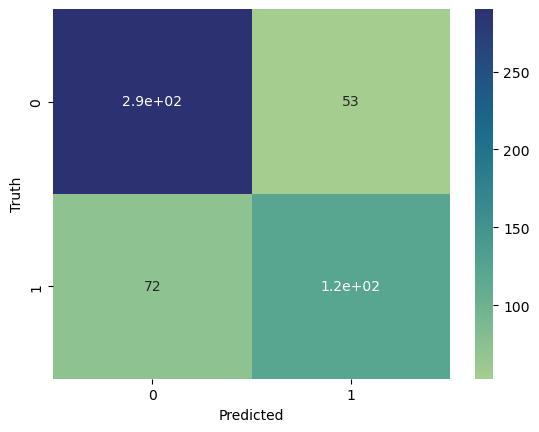

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True,cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(50.722222222222214, 0.5, 'Truth')

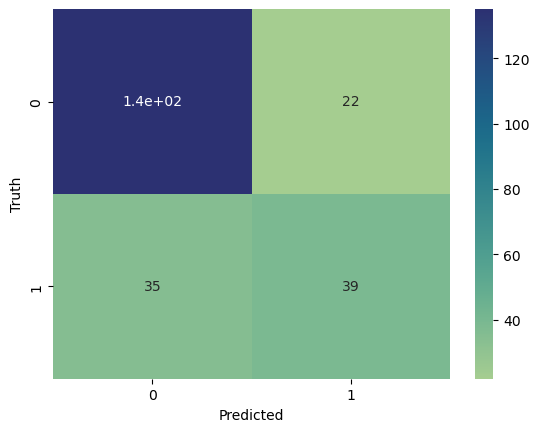

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm1, annot=True,cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
from sklearn.metrics import classification_report
cr=classification_report(y_train,y_pred_train)
print(cr)
cr1=classification_report(y_test,y_pred_test)
print(cr1)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       343
           1       0.70      0.63      0.66       194

    accuracy                           0.77       537
   macro avg       0.75      0.74      0.74       537
weighted avg       0.76      0.77      0.76       537

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       157
           1       0.64      0.53      0.58        74

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.75       231



In [33]:
accuraccy=model.score(x_test,y_test)
accuraccy

0.7532467532467533

In [35]:
print(model.predict([[1,189,60,23,846,30.1,0.398,59]]))

[1]
